In [34]:
pip install pandas matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 631.0 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 52.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 6.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 35.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


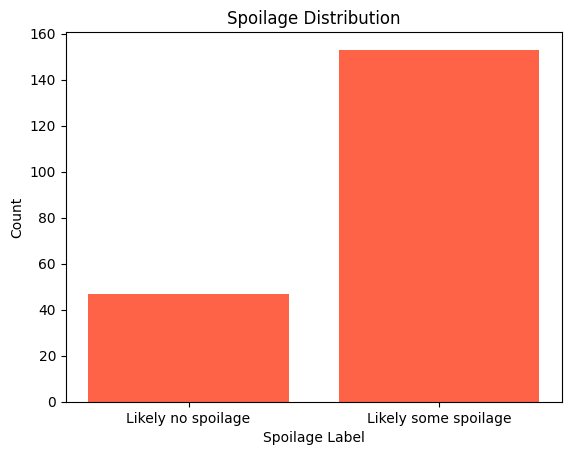

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(6)

n_samples = 200

temperature = np.random.uniform(12, 30, n_samples)  # in °C
humidity = np.random.uniform(55, 95, n_samples)     # in %
duration = np.random.uniform(1, 8, n_samples)       # in days

degradation_score = 2 * (temperature - 12)/18 + 2 * (humidity - 55)/40 + duration/8
spoilage_label = (degradation_score > 2).astype(int)

df = pd.DataFrame({
    'Temperature (°C)': np.round(temperature, 2),
    'Humidity (%)': np.round(humidity, 2),
    'Transit Duration (days)': np.round(duration, 2),
    'Spoilage': spoilage_label
})

# Save to CSV
df.to_csv("simulated_tomato_data.csv", index=False)

# Plot spoilage distribution
label_counts = df['Spoilage'].value_counts().sort_index()
plt.bar(["Likely no spoilage", "Likely some spoilage"], label_counts.values, color = "tomato")
plt.xlabel('Spoilage Label')
plt.ylabel('Count')
plt.title('Spoilage Distribution')
plt.show()


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


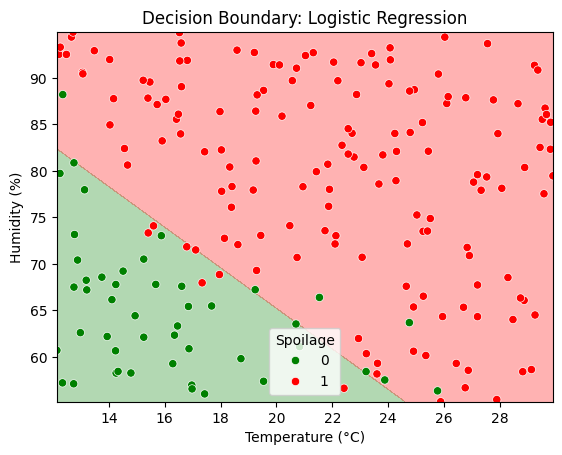

In [39]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression

X = df[['Temperature (°C)', 'Humidity (%)']]
y = df['Spoilage']
model = LogisticRegression().fit(X, y)

xx, yy = np.meshgrid(np.linspace(X['Temperature (°C)'].min(), X['Temperature (°C)'].max(), 100),
                     np.linspace(X['Humidity (%)'].min(), X['Humidity (%)'].max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['green', 'red'])
sns.scatterplot(data=df, x='Temperature (°C)', y='Humidity (%)', hue='Spoilage', palette=['green', 'red'])
plt.title('Decision Boundary: Logistic Regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Spoilage')
plt.show()
